# EXPLORATORY DATA ANALYSIS (EDA)
- Descriptive Statistics
- Top Data Related Job Titles in Demand
- Leading Job Platforms for Data Careers
- Essential Skills for Data Jobs
- Comparing Salaries Across Data Roles

In [ ]:
SELECT * FROM data_cleaned.csv

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Descriptive Statistics
Generate basic statistical summaries like mean, median, standard deviation and range to understand the fundamental tendencies and dispersion in the dataset.

In [ ]:
df.describe().round(2)

## Top Data Related Job Titles in Demand: What are the Most Mopular Job Titles?

Identify the most frequently advertised job titles in the data field to determine which positions are currently most sought-after by employers.

In [57]:
df_jobs = pd.read_csv('../exported data/1_popular_job_titles.csv')
df_jobs.head(10)

,job_title,total_job_postings
0,Data Analyst,122051
1,Data Scientist,121911
2,Data Engineer,112251
3,Senior Data Engineer,29436
4,Senior Data Scientist,27903
5,Senior Data Analyst,23624
6,Business Analyst,13605
7,Software Engineer,8180
8,M.Learning Engineer,3849
9,Cloud Engineer,1963


In [ ]:
-- Selecting the most frequent job titles in data field
SELECT job_title, COUNT(job_title) AS total_job_postings
FROM data_cleaned.csv
GROUP BY job_title
ORDER BY total_job_postings DESC

In [ ]:
#popular_titles.to_csv('popular_job_titles.csv')
#job_titles_pct = df['job_title'].value_counts(normalize=True).round(5)
#job_titles_pct.to_csv('popular_job_titles_pct.csv')

In [ ]:
#job_platforms = df['job_platform'].value_counts(normalize=False).head(10)
#job_platforms.to_csv('popular_job_platforms.csv')

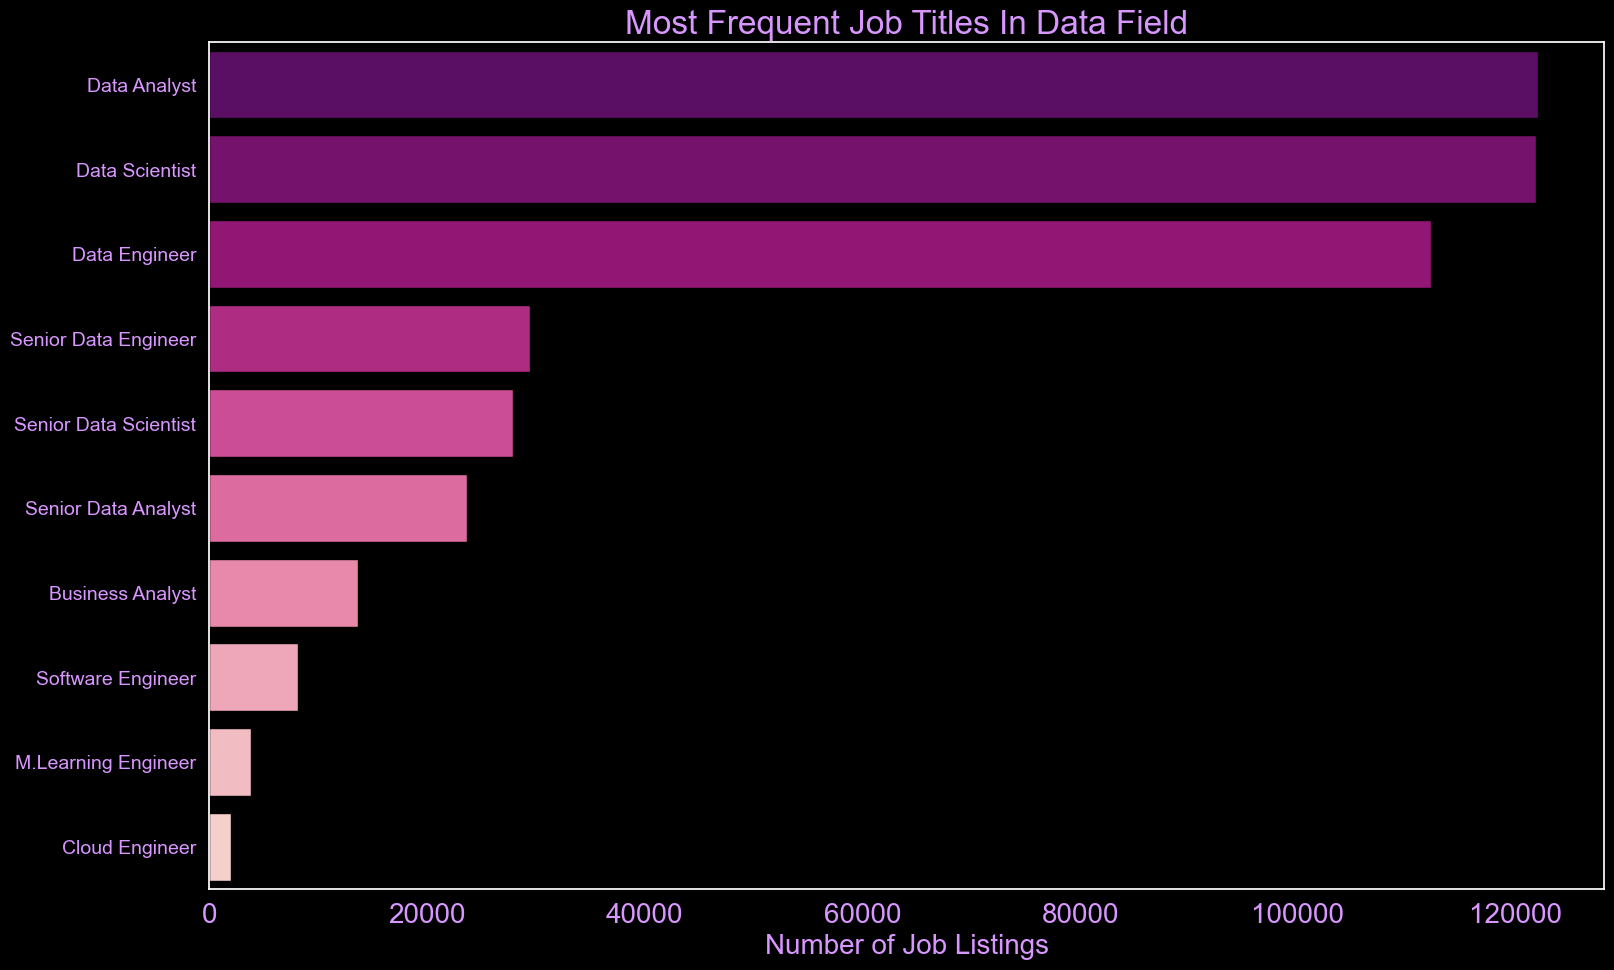

In [72]:
# Plotting a bar chart for the most frequent job titles

# Sorting the DataFrame by 'total_job_postings' in descending order for a horizontal bar graph
#df_sorted = popular_titles.sort_values('total_job_postings', ascending=False)

# !!! for dark theme use:
sns.set(style="dark")
plt.style.use("dark_background")

plt.figure(figsize=(18,11))
palette = sns.color_palette('RdPu_r', n_colors=12) 

sns.barplot(x='total_job_postings', y='job_title', data=df_jobs, palette=palette, edgecolor='black')
plt.title('Most Frequent Job Titles In Data Field', fontsize = 24, color='#d896ff')
plt.xlabel('Number of Job Listings', fontsize = 20, color='#d896ff')
plt.xticks(fontsize=20, color='#d896ff')
plt.yticks(fontsize=14, color='#d896ff')
plt.ylabel('')

#plt.savefig('../graphs/9.1.3_all_skills_combined_pct.png')

plt.show()


## Leading Job Platforms for Data Careers: What are the Most Commonly Used Job Platforms?
Analyze which online platforms are most commonly used for posting data-related job vacancies, indicating where job seekers are most likely to find these opportunities.

In [ ]:
SELECT job_platform, COUNT (job_platform) AS total_job_platforms
FROM data_cleaned.csv
GROUP BY job_platform
ORDER BY total_job_platforms DESC
LIMIT 10

In [73]:
df_platforms = pd.read_csv('../exported data/3_popular_job_platforms.csv')
df_platforms.head(10)

,job_platform,job_posts
0,LinkedIn,121690
1,BeBee,48370
2,Indeed,28170
3,Trabajo.org,22126
4,Recruit.net,17946
5,ZipRecruiter,17373
6,Snagajob,13834
7,BeBee India,8908
8,BeBee Singapore,6976
9,Monster,6075


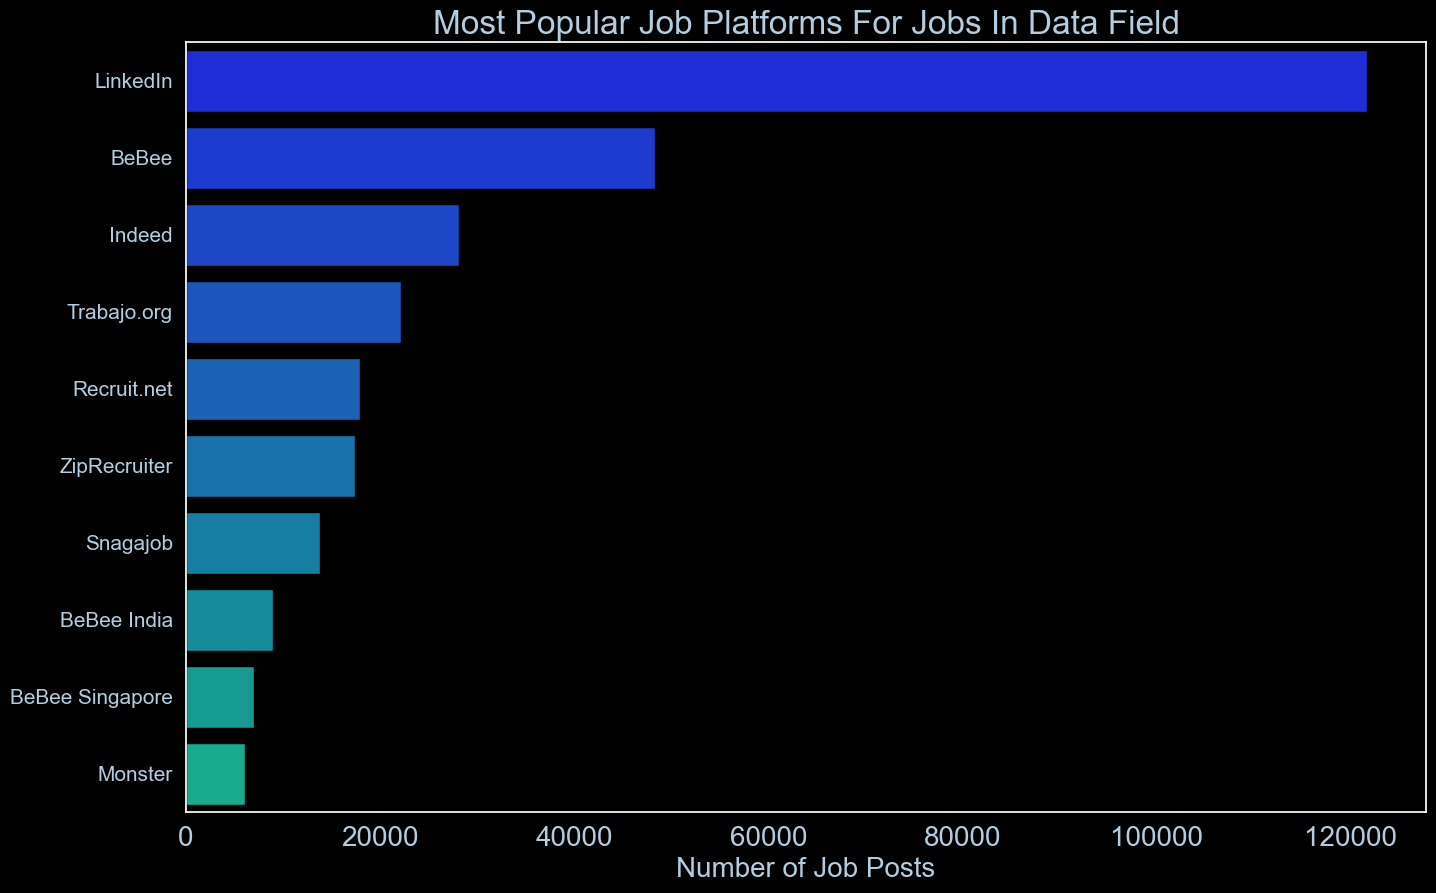

In [89]:
# Plotting a bar chart for the most frequent job platforms

sns.set(style="dark")
plt.style.use("dark_background")

plt.figure(figsize=(16,10))
palette = sns.color_palette('winter', n_colors=12) 

sns.barplot(x='job_posts', y='job_platform', data=df_platforms, palette=palette, edgecolor='black')
plt.title('Most Popular Job Platforms For Jobs In Data Field', fontsize = 24, color='#b3cde0')
plt.xlabel('Number of Job Posts', fontsize = 20, color='#b3cde0')
plt.xticks(fontsize=20, color='#b3cde0')
plt.yticks(fontsize=15, color='#b3cde0')
plt.ylabel('')

#plt.savefig('../graphs/2_popular_job_platforms.png')

plt.show()


## Essential Skills for Data Jobs: What are the Most On-Demand Skills in Data Jobs?
Extract and prioritize the key skills and qualifications mentioned across job listings to highlight the most in-demand competencies for data professionals.

In [ ]:
# Splitting the skills in each row and calculating the frequency of each individual skill
skill_frequency = df['skill'].str.split(', ', expand=True).stack().value_counts()

In [ ]:
skill_frequency

In [7]:
df = pd.read_csv('../exported data/5_popular_skills.csv')
df2 = df.head(10)

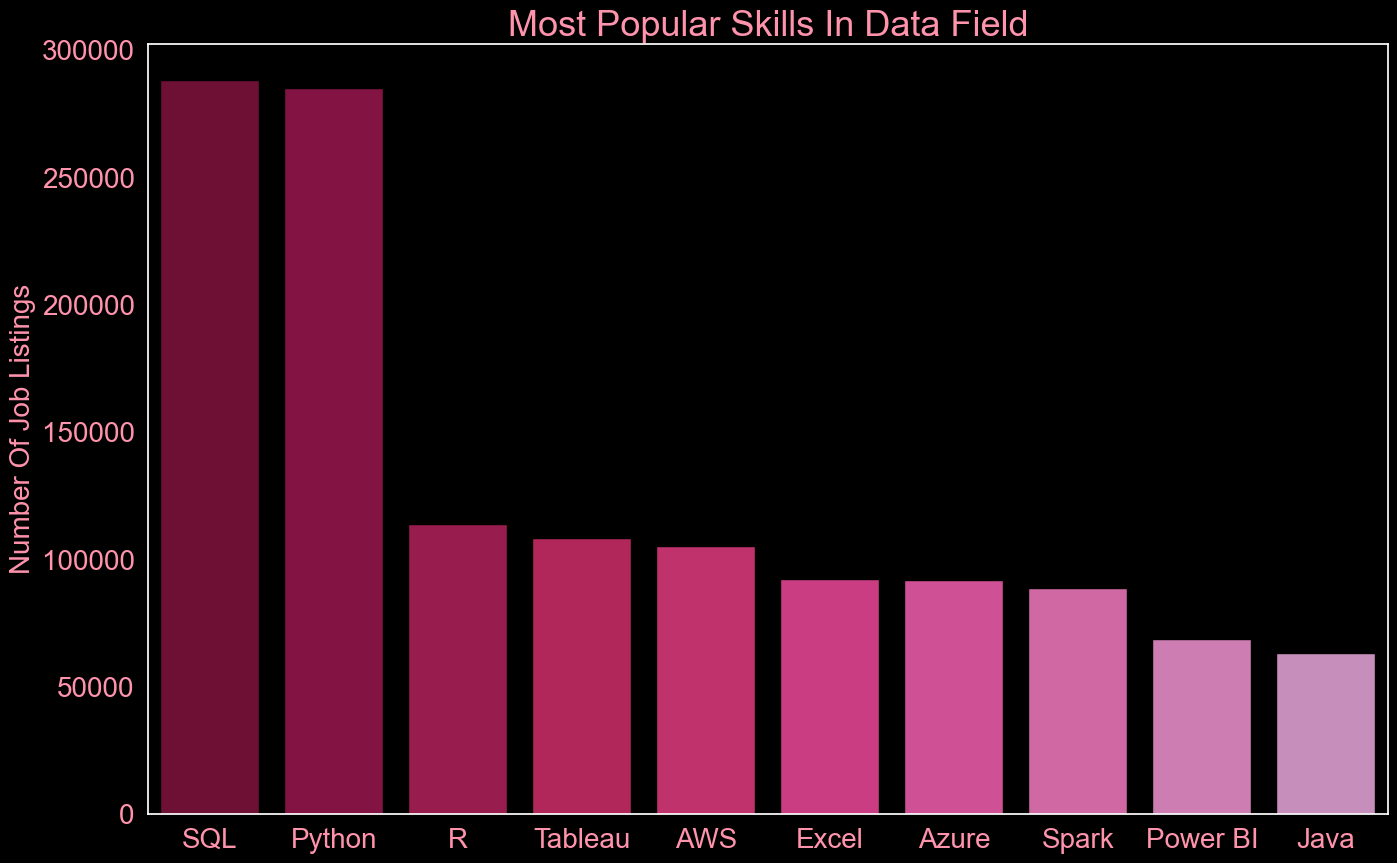

In [86]:
# Plotting Top 10 Most Frequent Skills
#top_skills = skill_frequency.head(10)

sns.set(style="dark") 
plt.style.use("dark_background")
plt.figure(figsize=(16,10))

palette = sns.color_palette('PuRd_r', n_colors=16) 

sns.barplot(x='skill', y='frequency', data=df2, palette=palette, edgecolor='black')
plt.title('Most Popular Skills In Data Field', fontsize=26, color='#ff93ac')
plt.xlabel('', fontsize=14, color='#ff93ac')
plt.ylabel('Number Of Job Listings', fontsize=20, color='#ff93ac')
plt.xticks(fontsize=20, color='#ff93ac')
plt.yticks(fontsize=20, color='#ff93ac')

plt.savefig('../graphs//3_popular_skills.png')


plt.show()

## Comparing Salaries Across Data Roles
- A comparative analysis of salary offerings for different data-related job titles to understand compensation trends in the field.
- The number of missing values for each job title is too high to draw reliable conclusions.
- Despite the significant number of missing values, this analysis can still provide insights into which job titles are generally associated with higher earnings.


In [ ]:
# Checking the null value count per each job title
## The number of missing values for each job title is too high to draw reliable conclusions.
## Despite the significant number of missing values, this analysis can still provide insights into which job titles are generally associated with higher earnings

job_title_null_count = df[df['salary'].isnull()].groupby('job_title').size()
total_counts = df.groupby('job_title').size()

# Combining the counts into a single DataFrame
summary = pd.DataFrame({'Total Count': total_counts, 'Null Count': job_title_null_count})

# Filling NaN values with 0, as NaN indicates no null values for that job title
summary = summary.fillna(0)

# Converting Null Count to integer for cleaner presentation
summary['Null Count'] = summary['Null Count'].astype(int)

print(summary)


### Average Salaries by Job Title

In [ ]:
-- Calculating the average salary by job title and with the 'CAST' function, converting the results to integers for an easier readibility
SELECT job_title, CAST(AVG(salary) AS INT) AS avg_salary
FROM data_cleaned.csv
GROUP BY job_title
ORDER BY avg_salary DESC

In [ ]:
# Plotting a bar chart for average salaries in USA
df_sorted = salary_avg.sort_values('avg_salary', ascending=False)

# !!! for dark theme use:
#sns.set(style="darkgrid")
#plt.style.use("dark_background")

sns.set_style(style="whitegrid") 
plt.style.use("default")
plt.figure(figsize=(16,10))
palette = sns.color_palette('Spectral_r', n_colors=12) 

sns.barplot(x='avg_salary', y='job_title', data=df_sorted, palette=palette)
plt.title('Average Salaries for Data Jobs in United States', fontsize = 16)
plt.xlabel('Average Salary (USD) ', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('')

#plt.savefig('9_average_salaries.png')

plt.show()


In [ ]:
#salary_avg.to_csv('7_average_salaries.csv')

### Median Salaries by Job Title

In [95]:
df3 = pd.read_csv('../exported data/8_median_salaries.csv')
median_salary = df3.head(10)
median_salary

,job_title,median_salary
0,Senior Data Engineer,155000
1,Senior Data Scientist,135144
2,Data Engineer,130000
3,Data Scientist,125000
4,M. Learning Engineer,124750
5,Software Engineer,100000
6,Senior Data Analyst,98650
7,Cloud Engineer,97984
8,Business Analyst,95000
9,Data Analyst,90000


In [ ]:
# Calculating the median salary by job title and converting the results to integers for an easier readibility
median_salary = df.groupby('job_title')['salary'].median()
median_salary_int = median_salary.astype(int)
median_salary_int.sort_values(ascending=False)

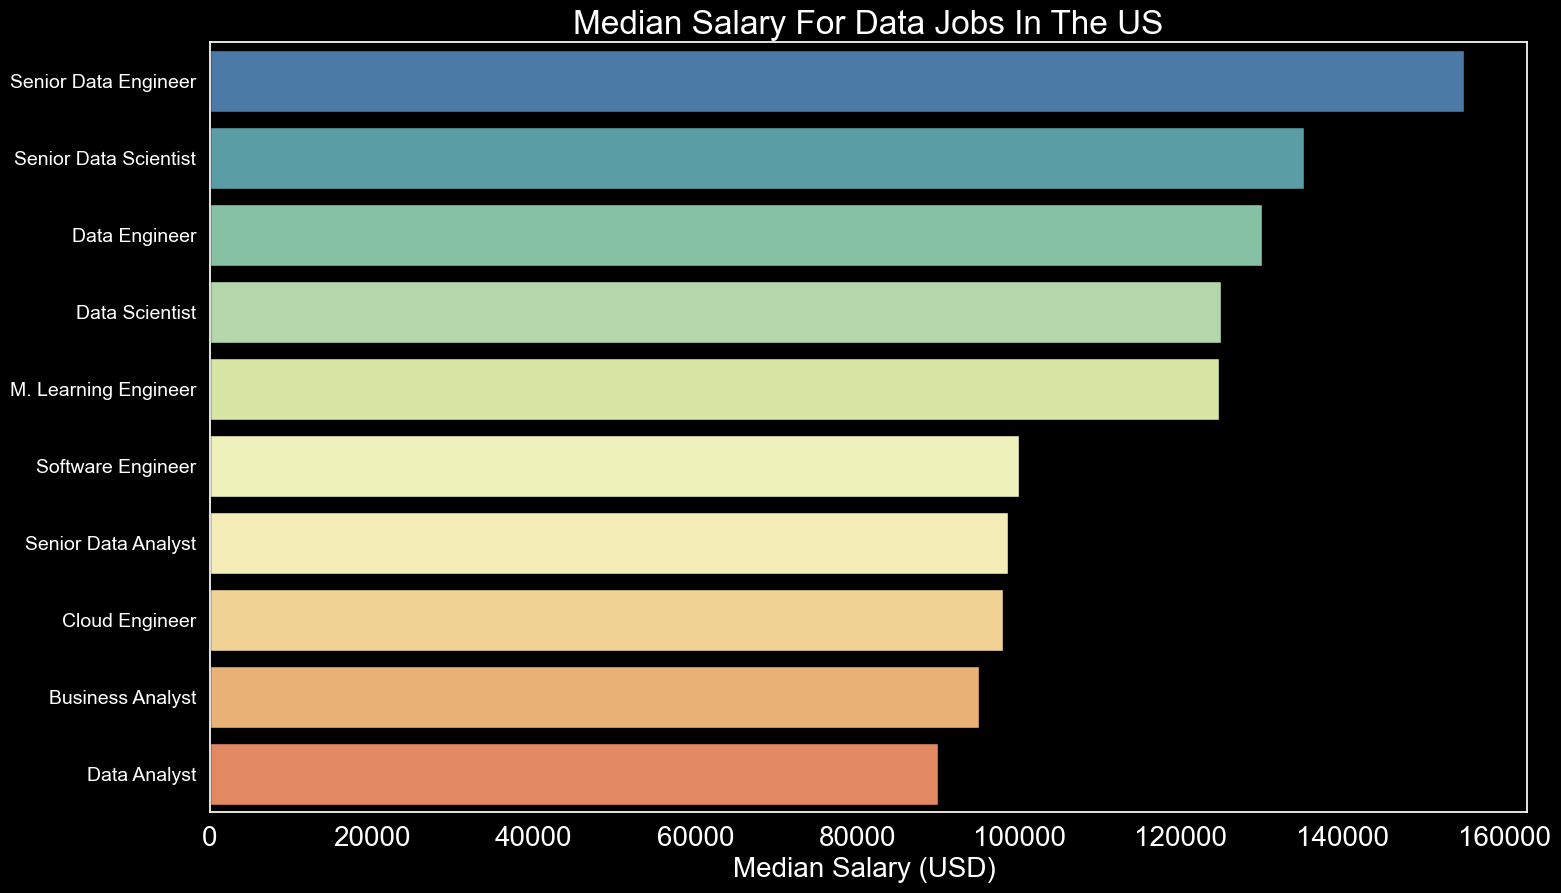

In [102]:
# Plotting a bar chart for the median salaries in USA

# !!! for dark theme use:
sns.set(style="dark")
plt.style.use("dark_background")

#sns.set_style(style="whitegrid") 
#plt.style.use("default")
plt.figure(figsize=(17,10))
palette = sns.color_palette('Spectral_r', n_colors=12) 

sns.barplot(x='median_salary', y='job_title', data=median_salary, palette=palette, edgecolor='black')
plt.title('Median Salary For Data Jobs In The US', fontsize = 24)
plt.xlabel('Median Salary (USD) ', fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel('')

plt.savefig('../graphs//5.2_median_salary.png')

plt.show()

In [103]:
salary = pd.read_csv('../data/data_cleaned.csv')
salary.head(2)

,job_title,country,salary,job_platform,skill
0,Senior Data Engineer,United States,NaN,KHON2 Jobs,"AWS, Spark, Kafka, Java, Scala, Python, SQL"
1,Data Scientist,United States,NaN,ViewAndApply,"Python, SQL, R, pySpark, databricks, scikit-le..."


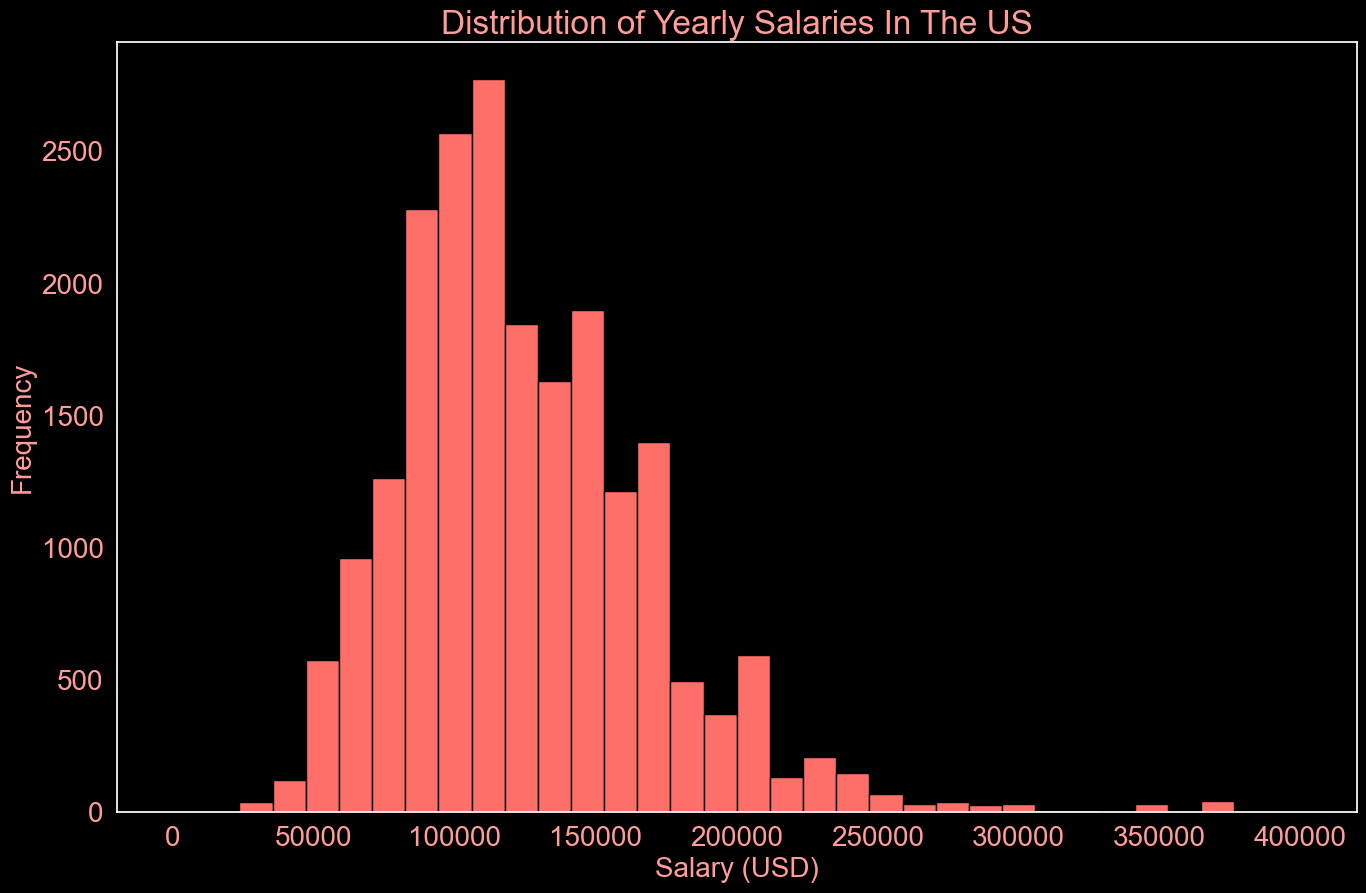

In [115]:
sns.set_style(style="dark") 
plt.style.use("dark_background")
plt.figure(figsize=(16,10))

plt.hist(salary['salary'], bins=34, range=(0, 400000), color='#ff6f69', edgecolor='black')

plt.title('Distribution of Yearly Salaries In The US', fontsize=24, color='#ff9e99')
plt.xlabel('Salary (USD)', fontsize=20, color='#ff9e99')
plt.ylabel('Frequency', fontsize=20, color='#ff9e99')
plt.xticks(fontsize=20, color='#ff9e99')
plt.yticks(fontsize=20, color='#ff9e99')

plt.savefig('../graphs/4.5_salary_dist.png')
plt.show()